In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

from sklearn.svm import SVC
import joblib

In [2]:
data = pd.read_csv("E:\\Dibyendu\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Prepared_data\\Heart Disease.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1


In [3]:
X = data.drop('target', axis=1)
Y = data['target']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size= 0.25, random_state = 355)

In [5]:
svc = SVC()

grid_param={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

grid_search = GridSearchCV(estimator = svc,
                     param_grid = grid_param,
                     cv=10,
                     n_jobs =-1)



In [6]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 10, 'gamma': 0.001}


In [8]:
svc = SVC(C=10, gamma=0.001)

svc.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
# For Train Data

y_predict = svc.predict(x_train)

print("Based On trian Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_train, y_predict), '\n')
print("Accuracy_score: ", accuracy_score(y_train, y_predict), '\n')
print("classification_report: \n\n", classification_report(y_train, y_predict))

Based On trian Data


Confusion_matrix: 
 [[ 93  13]
 [ 10 111]] 

Accuracy_score:  0.8986784140969163 

classification_report: 

               precision    recall  f1-score   support

           0       0.90      0.88      0.89       106
           1       0.90      0.92      0.91       121

    accuracy                           0.90       227
   macro avg       0.90      0.90      0.90       227
weighted avg       0.90      0.90      0.90       227



0.8973569312334321

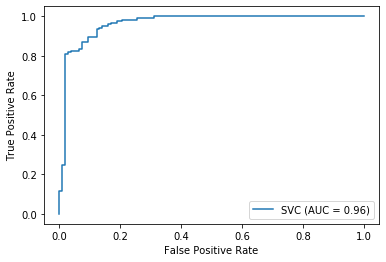

In [10]:
metrics.plot_roc_curve(svc, x_train, y_train)
metrics.roc_auc_score(y_train, y_predict, average=None)

In [11]:
# For Test Data

y_predict1 = svc.predict(x_test)

print("Based On test Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_test, y_predict1), '\n')
print("Accuracy_score: ", accuracy_score(y_test,y_predict1), '\n')
print("classification_report: \n\n", classification_report(y_test,y_predict1))

Based On test Data


Confusion_matrix: 
 [[22 10]
 [13 31]] 

Accuracy_score:  0.6973684210526315 

classification_report: 

               precision    recall  f1-score   support

           0       0.63      0.69      0.66        32
           1       0.76      0.70      0.73        44

    accuracy                           0.70        76
   macro avg       0.69      0.70      0.69        76
weighted avg       0.70      0.70      0.70        76



0.6960227272727273

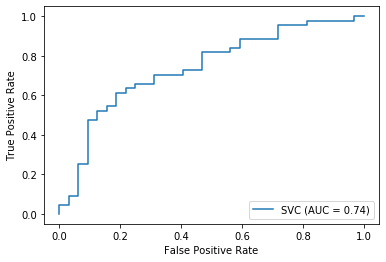

In [12]:
metrics.plot_roc_curve(svc, x_test, y_test)
metrics.roc_auc_score(y_test, y_predict1, average=None)

# Here using SupportVector Classifier,


    for train data:--
        
        accuracy score is: 89% (***)
        precision is:  90%
        recall is: 90%

            
    for test data:--
        
        accuracy score is: 69% (***)
        precision is:  70%
        recall is: 70%
            
            
# Therefore we can say that my Model is not a Generalized Model (low bias and High variance)

In [13]:
# Model Dumping


joblib.dump(svc, "E:\\Dibyendu\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Models_save\\svc.pkl")


['E:\\Dibyendu\\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Models_save\\svc.pkl']